## EDSML group project

## Seismic imaging revision assignment


### Assignment set: 11 am 18th Jan
### Assignment to be submitted: 2pm 19th Jan


### **Format**: written answers to questions in a Jupyter notebook (please also include figures from the lecture notes or other referenced sources), coding to view seismic and calculate attributes

The purpose of this exercise is to provide you with a structured way to consolidate your understanding of seismic imaging. We have been through a lot of content quickly in 2.5 days and this exercise offers you an opportunity to think more deeply about these concepts to help you prepare for the assessed quiz next week (on Fri 26th Jan). You could rush through the activity quickly in a couple of hours just copying and pasting from the notes- but I encourage you to use this time to really make sure you understand things. Talk things through with your group as well as the GTAs who will host drop-in sessions. I will provide you with feedback on your submissions by Tuesday 23rd Jan, to help you prepare for the assessed quiz. At the bottom of this notebook you will find three example questions to show you the format of the assessed quiz. Please answer these questions and you will receive feedback on these too.

#### Submission process:

As part of your group project, it's crucial that we maintain an organized and efficient submission process. To ensure this, please adhere to the following guidelines:

- One Submission Per Group: Each group is required to submit only one answer. It's important that you collaborate and consolidate your work within your group to finalize a single, representative notebook.

- Please include your group name, your answers in th email and send it to:

rebecca.bell@imperial.ac.uk

psalah@imperial.ac.uk

- Feedback Process: After the submission deadline, Becky will review the submitted notebooks and provide feedback. It's essential to submit by the deadline to receive timely feedback.



#### Ancillary files

If your code or answers depend on additional files, such as images, photos, or small data files, then make sure to include these in your submission as well.

## -Premise-

You work for a company who have collected a 3D seismic reflection dataset in two-way travel time, using an airgun source in an area where companies are interested in exploring for geothermal energy production. You have a potential buyer for the seismic data but they have a few questions and would like to learn more about how they can use Python to view and work with the data and they want to see some data examples and understand the future potential.

Please address their questions in the notebook below. I have provided some guidance on how much detail should be in these responses in terms of a max word limit (this is a maximum NOT a target. You can answer these questions well with far fewer words). The questions specify whether I am expecting text and figures, code or both text and code to answer the question.

Feel free to recycle code from exercise 3 and 4 (making sure you understand it!) and you can also explore additional libraries if you so wish (but not required). 

**The exercise will require you to load SEG-Y file Thebe_small2.sgy which you can find in the 'data' folder here**- https://imperiallondon-my.sharepoint.com/personal/psalah_ic_ac_uk/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fpsalah%5Fic%5Fac%5Fuk%2FDocuments%2Fdata%2DBecky%2Dexercises&ga=1  

### Name of your company (be inventive!):

In [ ]:
## THE PINGERS

### Team members names and email addresses:

In [ ]:
#

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import segyio
import itertools
import scipy.ndimage
import pandas as pd
from mayavi import mlab

In [90]:
def explore3d(data_cube, preset = True, I=-1, X = -1 , Z=-1):
    """
    
    """
    source = mlab.pipeline.scalar_field(data_cube)
    source.spacing = [1, 1, -1]
    vm = np.percentile(data_cube, 95) #may need to play a little with the 95
    
    if preset == True:
        nx, ny, nz = data_cube.shape
        I = nx//2
        X = ny//2
        Z = nz//2

    mlab.pipeline.image_plane_widget(source, plane_orientation='x_axes', 
                                     slice_index=I, colormap='coolwarm', vmin=-vm, vmax=vm)
    mlab.pipeline.image_plane_widget(source, plane_orientation='y_axes', 
                                     slice_index=X, colormap='coolwarm', vmin=-vm, vmax=vm)
    mlab.pipeline.image_plane_widget(source, plane_orientation='z_axes', 
                                     slice_index=Z, colormap='coolwarm', vmin=-vm, vmax=vm)
    mlab.show()


def generate_dynamic_range(data, slice_idx, slice_type):
    if slice_type == "inline":
        _slice = data[slice_idx, :, :].T
    elif slice_type == "xline":
        _slice = data[:, slice_idx, :].T
    elif slice_type == "depth":
        _slice = data[:, :, slice_idx].T
    else:
        raise TypeError()

    
    mu_slice = np.mean(_slice)
    std_slice = np.std(_slice)
    min_slice = np.max(_slice)
    max_slice = np.min(_slice)

    vmin = (mu_slice - 2*std_slice)
    vmax = (mu_slice + 2*std_slice)

    return vmin, vmax, min_slice, max_slice

In [5]:
base_segy = segyio.open('../data_groupproject2/Thebe_small2', ignore_geometry= False) 
print(segyio.tools.wrap(base_segy.text[0]))

C 1 SEGY OUTPUT FROM Petrel 2017.1 Thursday, November 18 2021 12:25:33
C 2 Name: FullStack_06-34degree Realized 1 Crop 1 Type: 3D seismic          C 3
C 4 First inline: 1556   Last inline: 2056
C 5 First xline:  1066   Last xline:  2099
C 6 CRS: Undefined
C 7 X min: 723285.20 max: 740842.39 delta: 17557.19
C 8 Y min: 7843915.02 max: 7861339.03 delta: 17424.01
C 9 Time min: -2170.50 max: -1474.50 delta: 696.00
C10 Lat min: - max: - delta: -
C11 Long min: - max: - delta: -
C12 Trace min: -2169.00 max: -1476.00 delta: 693.00
C13 Seismic (template) min: -9375.49 max: 12558.00 delta: 21933.49
C14 Amplitude (data) min: -9375.49 max: 12558.00 delta: 21933.49
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline

In [7]:
depth = base_segy.samples 
inlines = base_segy.ilines 
xlines = base_segy.xlines
data = segyio.tools.cube(base_segy)

# C 4 First inline: 1556   Last inline: 2056
# C 5 First xline:  1066   Last xline:  2099

print (inlines.size) # inline numbers
print (xlines.size) # xline numbers
print (depth.size) # time/depth samples
print (data.shape) # data in 3d array

501
1034
232
(501, 1034, 232)


In [8]:
first_inline, last_inline = 1556, 2056
first_xline, last_inline = 1066, 2099

**Question 1**: Thank you for approaching us with your 3D seismic dataset. Could you explain to us briefly, using any figures you wish, what seismic reflection data is and why it might be useful for our company finding sites for geothermal energy production? (text,figures)(max. 300 words)

### Answer 1: Seismic Reflection Data:

**Lecture 1**

- Seismic reflection data is an attempt to estimate the properties of the earth's subsurface using seismic waves. By generating seismic signals and receiving them at known sensor locations, surface properties can be inferred/calculated. 
- The signals are reflected back to the receivers after travelling to/through N (N <= 1) surfaces and being reflected. These signals will be recieved at different times and at different amplitudes due to the surface properties governing signal propagation. 
- Signals will travel faster in low porosity surfaces and slower in high porous surfaces. The behaviour of speed is proportional to the density of the surface (high density = low porosity) as shown in the nafe-drake curve and the Garner relationship (p = 0.31v^0.25) . (see slide 24, lecture 1)
- The amount of energy (the amplitude) that is reflected back from each interface is dependent on the Acoustic Impedance (Z) contrast. The acoustic impedance for a medium is, Z = p.v where v is the density and v is the p-wave velocity.

**Question 2**: How does an airgun source differ to a sparker source? We are interested in imaging under the seabed to depths of >1 km, ideally down to 5 km. Would airgun or sparker data be better for us? Are there any environmental impacts of these methods and how are they mitigated? (text,figures) (max. 300 words)

### Answer 2: airgun versus sparker source

**Slides 11-15, Lecture 2**

- Airguns are lower frequency sources than Sparkers. Lower frequency sources can image deeper but with lower resolution when compared to higher frequency sources. 
- Airguns are able to penetrate up to 15km where as sparkers can penetrate up to 2km.

**Question 3**: Could you explain to us what is the SEGY data format and provide us with a commented demonstration of how we can load SEGY data in Python? What are the key issues associated with loading SEGY data in Python? What are the benefits of using Python over other software? (text, code, figures) (max. 300 words)


#### Answer 3: .SEGY Format Explained

- The **SEGY** data format was developed by the Society of Exploration Geophysicists (SEG). It is a ~ old file format that was created to read and write data to tapes and its not very efficient. The .SEGY file contains acquisition, processing and geometry information. The data is in the form of traces, where each trace corresponds to a stack of CMP gathers (for a trace). 

```
import segyio
file = segyio.open('<filenameDIR>', ignore_geometry= False) 
```

**insert sarahs work here

- Python is able perform actions that would require multiple, indepenent softwares to acheive. Each of these softwares would require their own training, licenses, cost and transparency. 

**Question 4**: Please could you present to us some examples of the data from inline 1650 and xline 1600 and time slice 1800 ms. Can you describe what the data looks like (e.g. do you see high/low amplitude reflections? Are the reflections continuous or chaotic?) and identify one obvious geological feature that you can see in xline 1600? (text, code,figures) (max. 300 words)

In [14]:
explore3d(data)

#### Q4. A) Inline = 1650

In [91]:
# inline = 1650
inline_dim, xline_dim, depth_dim = data.shape
inline_to_plot = 1650
slice_idx = inline_to_plot - first_inline

# debug info
print(f"data dims = (inline: {inline_dim}, xline: {xline_dim}, depth: {depth_dim})") # (inline, xline, depth)
print(f"Plotting slice @ inline = {inline_to_plot}")
print(f"slice dims: {data[slice_idx, :, :].shape} ")

# get vmin and vmax to use dynamic range
vmin, vmax, _, _ = generate_dynamic_range(data=data, slice_idx=slice_idx, slice_type='inline')

print(f"dynamic range: (vmin: {vmin}, vmax: {vmax})") 

data dims = (inline: 501, xline: 1034, depth: 232)
Plotting slice @ inline = 1650
slice dims: (1034, 232) 
dynamic range: (vmin: -1421.408376455307, vmax: 1425.850168466568)


In [92]:
def plot_slice(data, slice_idx, vmin, vmax, slice_info):
    """plot a 3d seismic slice."""
    if slice_info[0] == "inline":
        _slice = data[slice_idx, :, :].T
    elif slice_info[0] == "xline":
        _slice = data[:, slice_idx, :].T
    elif slice_info[0] == "depth":
        _slice = data[:, :, slice_idx].T
    else:
        raise TypeError()

    # plot slice
    fig1, ax1 = plt.subplots(figsize=(10, 12))
    obj = ax1.imshow(X=_slice,
                        cmap='seismic',
                        vmin=vmin,
                        vmax=vmax)
    ax1.set_title(f"data slice @ {slice_info[0]} = {slice_info[1]}", fontsize=8)
    fig1.colorbar(obj, shrink=0.2, ax=ax1)


    fig2, ax2 = plt.subplots(figsize=(4, 4))
    # plot histogram (with 1std and 2std lines plotted)
    ax2.hist(_slice.ravel(), bins=100, color='b')
    ax2.axvline(x=vmin, linestyle='dashed', color='g')
    ax2.axvline(x=vmax, linestyle='dashed', color='g')
    ax2.axvline(x=vmin+slice_idx, linestyle='dashed', color='r')
    ax2.axvline(x=vmax-slice_idx, linestyle='dashed', color='r')
    ax2.set_title("slice data distribution.", fontsize=8)

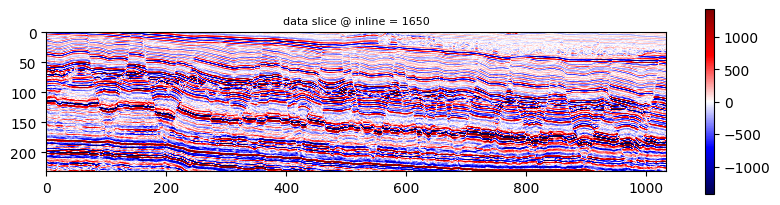

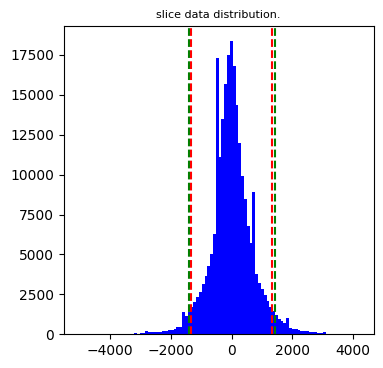

In [85]:
plot_slice(data=data, slice_idx=slice_idx, vmin=vmin, vmax=vmax, slice_info=["inline", inline_to_plot])

#### Q4. B) xline = 1600

In [93]:
# xline = 1600
inline_dim, xline_dim, depth_dim = data.shape
xline_to_plot = 1600
slice_idx = xline_to_plot - first_xline

# debug info
print(f"data dims = (inline: {inline_dim}, xline: {xline_dim}, depth: {depth_dim})") # (inline, xline, depth)
print(f"Plotting slice @ xline = {xline_to_plot}")
print(f"slice dims: {data[:, slice_idx, :].shape} ")

# get vmin and vmax to use dynamic range
vmin, vmax, _, _ = generate_dynamic_range(data=data, slice_idx=slice_idx, slice_type='xline')

print(f"dynamic range: (vmin: {vmin}, vmax: {vmax})") 

data dims = (inline: 501, xline: 1034, depth: 232)
Plotting slice @ inline = 1600
slice dims: (501, 232) 
dynamic range: (vmin: -1273.783862709999, vmax: 1274.799145102501)


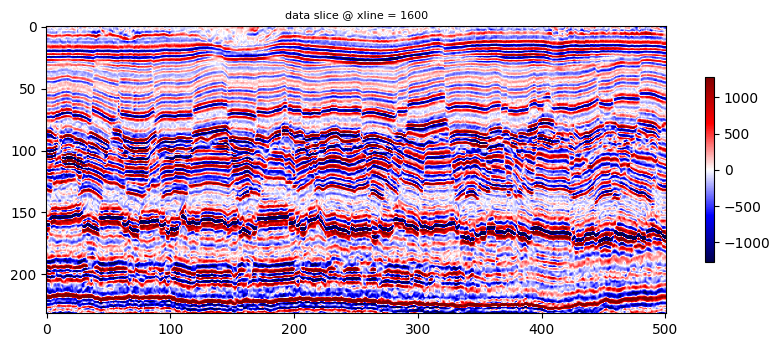

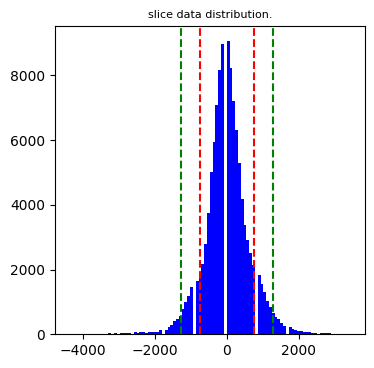

In [94]:
plot_slice(data=data, slice_idx=slice_idx, vmin=vmin, vmax=vmax, slice_info=["xline", xline_to_plot])

#### Q4. C) Depth = 1800 ms

In [122]:
# T -2170.50 max: -1474.50 delta: 696.00
total_time  = -1474.50 - (-2170.50)
total_time

depth_dim = data.shape[-1]

dt = total_time / depth_dim

print(f"dt = {dt}")

assert (len(depth) * dt) == total_time


# therefore the 1800 ms depth is 
t = 1800 - 1474.50 

depth_idx = int(t / dt)
depth_idx

dt = 3.0


108

In [123]:
# depth ~ t = 1800ms
inline_dim, xline_dim, depth_dim = data.shape
slice_idx = depth_idx

# debug info
print(f"data dims = (inline: {inline_dim}, xline: {xline_dim}, depth: {depth_dim})") # (inline, xline, depth)
print(f"Plotting slice @ depth = {xline_to_plot}")
print(f"slice dims: {data[:, :, slice_idx].shape} ")

# get vmin and vmax to use dynamic range
vmin, vmax, _, _ = generate_dynamic_range(data=data, slice_idx=slice_idx, slice_type='depth')

print(f"dynamic range: (vmin: {vmin}, vmax: {vmax})") 

data dims = (inline: 501, xline: 1034, depth: 232)
Plotting slice @ depth = 1600
slice dims: (501, 1034) 
dynamic range: (vmin: -1332.3914532661438, vmax: 1343.3343768119812)


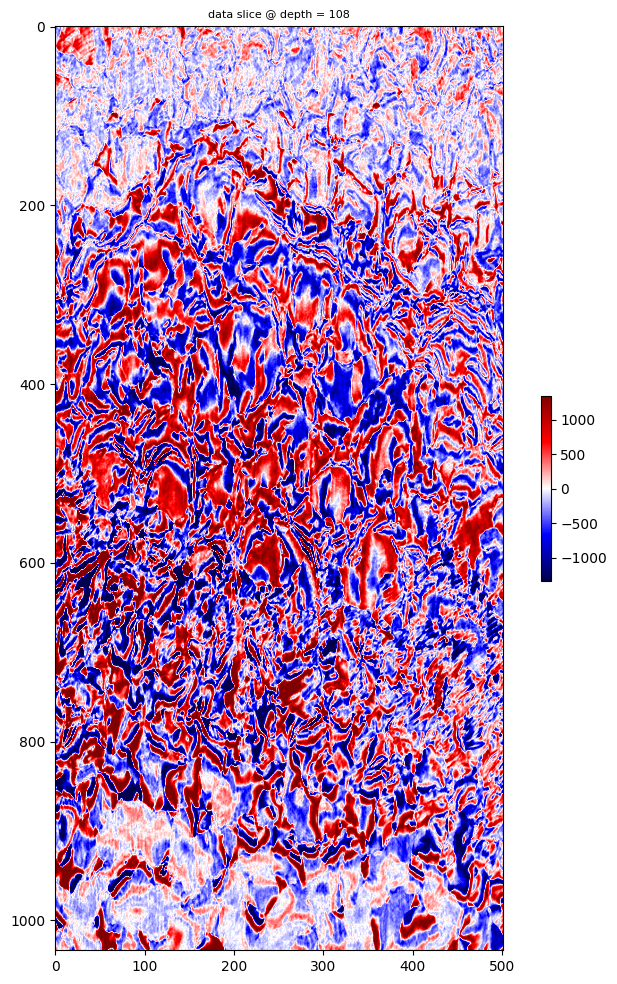

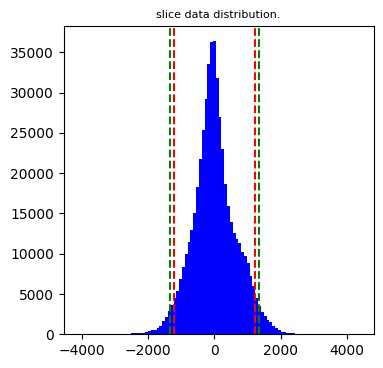

In [124]:
plot_slice(data=data, slice_idx=slice_idx, vmin=vmin, vmax=vmax, slice_info=["depth", depth_idx])

**Question 5**: What seismic attributes could you use to better highlight the geological feature you identified in Question 4? We would like to learn how these attributes work. Please calculate two seismic attributes of your choice to help better image this geological feature for time slice 1800 ms- which seismic attribute do you think works the best and why? (text, code,figures) (max. 300 words)

In [205]:
def moving_window(data, window, func):
    # `generic_filter` will give the function 1D input. We'll reshape it for convinence
    wrapped = lambda region: func(region.reshape(window))
    
    # Instead of an explicit for loop, we'll use a scipy function to do the same thing
    # The boundaries will be handled by "reflecting" the data, by default
    return scipy.ndimage.generic_filter(data, wrapped, window)

def marfurt_semblance(region):
    # We'll need an ntraces by nsamples array
    # This stacks all traces within the x-y "footprint" into one
    # two-dimensional array.
    region = region.reshape(-1, region.shape[-1])
    ntraces, nsamples = region.shape

    square_of_sums = np.sum(region, axis=0)**2
    sum_of_squares = np.sum(region**2, axis=0)
    sembl = square_of_sums.sum() / sum_of_squares.sum()
    return sembl / ntraces

In [205]:
_rms = moving_window(data=data[:,:,108-3:108+3], window=(3, 3, 9), func=rms)

In [206]:
marfurt = moving_window(data=data[:,:,108-3:108+3], window=(3, 3, 9), func=marfurt_semblance)
type(marfurt)

ERROR! Session/line number was not unique in database. History logging moved to new session 570


numpy.ndarray

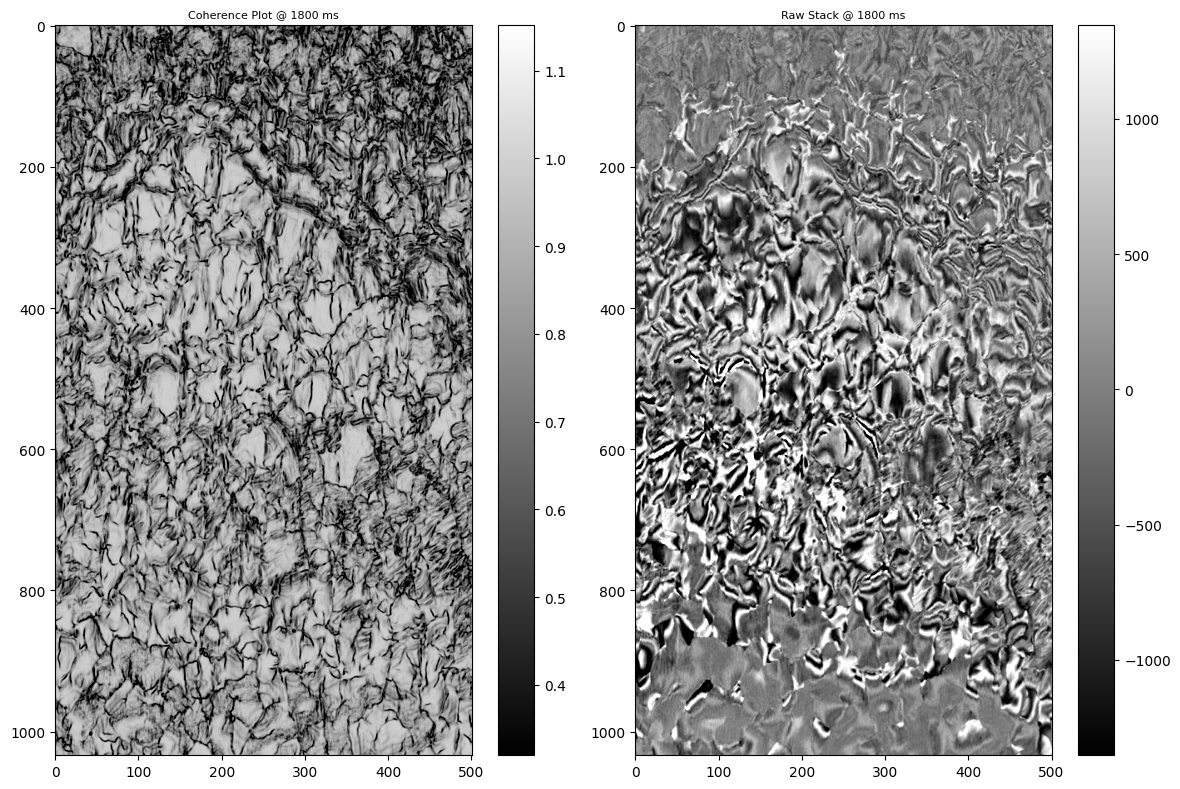

In [188]:
s = 1

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# coherence slice
mu = np.mean(marfurt[:, :, s])
sigma = np.std(marfurt[:, :, s])

obj = axs[0].imshow(marfurt[:, :, s].T, cmap='gray', vmin=mu-2*sigma, vmax=mu+2*sigma, aspect='auto')
axs[0].set_title('Coherence Plot @ 1800 ms', fontsize=8)
fig.colorbar(obj, ax=axs[0], shrink=1)

# raw slice
raw_slice = data[:,:,108-3:109+3][:, :, s]

mu_r = np.mean(raw_slice)
sigma_r = np.std(raw_slice)

obj = axs[1].imshow(raw_slice.T, cmap='gray', vmin=mu_r-2*sigma_r, vmax=mu_r+2*sigma_r, aspect='auto')
axs[1].set_title('Raw Stack @ 1800 ms', fontsize=8)
fig.colorbar(obj, ax=axs[1], shrink=1)

fig.tight_layout()

In [154]:
marfurt.T[0]

array([[9.6196198e-01, 9.1011238e-01, 5.8383840e-01, ..., 6.6666663e-01,
        3.3333331e-01, 1.0000000e+00],
       [9.6532702e-01, 9.1756272e-01, 6.7560667e-01, ..., 6.6042447e-01,
        3.2791325e-01, 1.0000000e+00],
       [9.7297299e-01, 9.5182598e-01, 8.1256038e-01, ..., 7.1111113e-01,
        3.1266147e-01, 3.7037093e-02],
       ...,
       [6.4102560e-01, 7.9365081e-01, 6.2962961e-01, ..., 7.9431862e-01,
        3.0592266e-01, 1.7041581e-02],
       [7.9084969e-01, 8.7338501e-01, 6.3636363e-01, ..., 2.1574974e-01,
        6.9805861e-02, 4.5308310e-01],
       [8.3456790e-01, 8.8994706e-01, 6.3201910e-01, ..., 6.4977136e-04,
        4.7285512e-01, 8.5513145e-01]], dtype=float32)

In [198]:
# two seismic attributes
# coherence plot 

depth_range_data = data[:,:,108-3:108+3]

d2ydx2 = np.zeros(depth_range_data.shape)
for i in range(depth_range_data.shape[0]):
    for j in range(depth_range_data.shape[1]):
        trace = depth_range_data[i,j,:]

        kernel = np.array([1, -2, 1])/ (dt**2)  #second order central https://en.wikipedia.org/wiki/Finite_difference
        
        # complete RMS calc
        diff = np.convolve(trace, kernel, 'same')
        
        #store results
        d2ydx2[i][j][:] = diff

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

(501, 1034, 1)

In [226]:
depth_range_data[i,j,:]

array([-1.7202740e+02, -2.5804111e+02, -3.4405481e+02, -2.5804111e+02,
       -7.6593142e-06,  8.6013695e+01], dtype=float32)

ValueError: object too deep for desired array

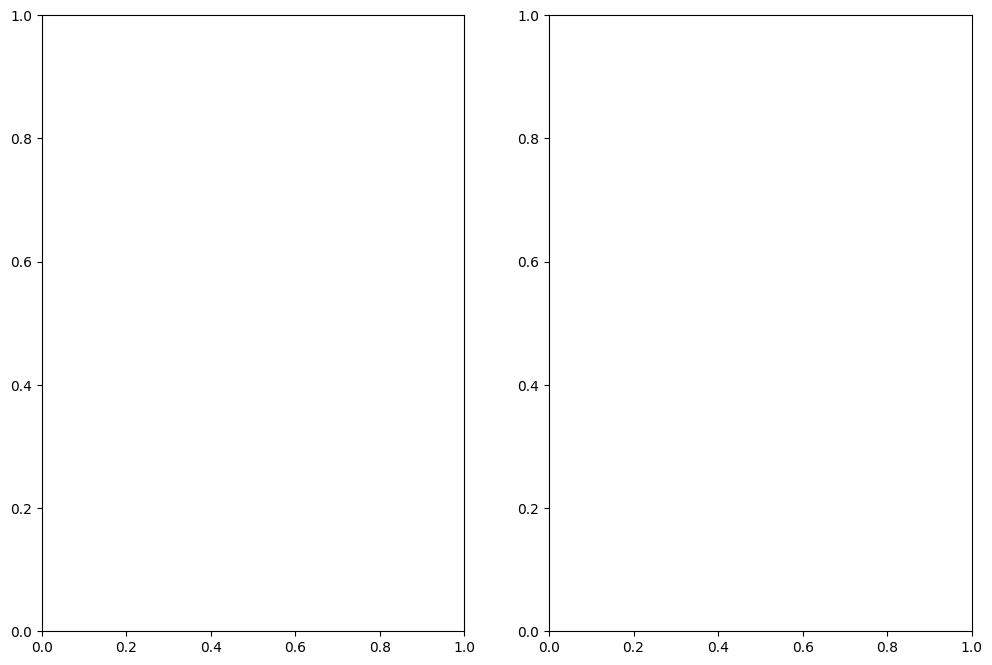

In [228]:
s = 0

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

raw_slice = depth_range_data[:, :, s]

trace_sq = np.square(raw_slice) # square 

kernel = np.repeat(np.ones(3), 3).reshape(3, 3) / 3

RMS_amp = np.sqrt(np.convolve(trace_sq, kernel, 'same'))

RMS_amp

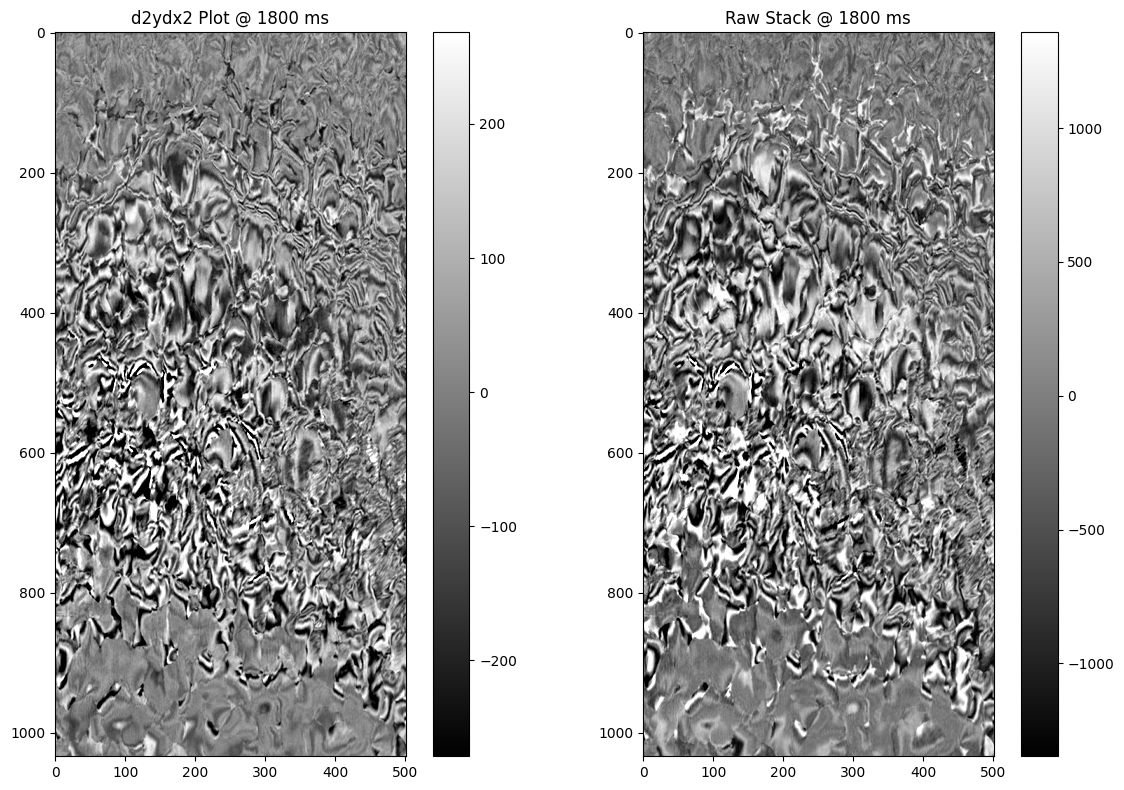

In [200]:
s = 0

fig, axs = plt.subplots(1, 2, figsize=(12, 8))

raw_slice = depth_range_data[:, :, s]

# coherence slice
mu = np.mean(d2ydx2[:, :, s])
sigma = np.std(d2ydx2[:, :, s])

obj = axs[0].imshow(d2ydx2[:, :, s].T, cmap='gray', vmin=mu-2*sigma, vmax=mu+2*sigma)
axs[0].set_title('d2ydx2 Plot @ 1800 ms', fontsize=12)
fig.colorbar(obj, ax=axs[0], shrink=1)

mu_r = np.mean(raw_slice)
sigma_r = np.std(raw_slice)
obj = axs[1].imshow(raw_slice.T, cmap='gray', vmin=mu_r-2*sigma_r, vmax=mu_r+2*sigma_r)
axs[1].set_title('Raw Stack @ 1800 ms', fontsize=12)
fig.colorbar(obj, ax=axs[1], shrink=1)

fig.tight_layout()

**Question 6**: Is there anything else you would like to show us/tell us to convince us that seismic data is the right dataset for us? In your view, how might the way we interpret seismic data change in the future?  (text,figures)(max 300 words)

--------------

### Below you can find three examples of the question format that will be used for the assessed quiz on 26th Feb. Please answer these questions as a team and I will give you feedback.

### 1)	Which of the following seismic sources would be the best to explore for unexploded ordnance a few meters below the seabed in shallow water:

#### a)	Airguns
#### b)	Vibroseis
#### c)	Dynamite
#### d)	Pingers


### 2)	………….. are used to receive seismic signals in land surveys (fill in the missing word)



### 3)	What is the best definition of the coherency attribute:
#### a)	It is a seismic attribute that measures root mean squared amplitude to determine how similar seismic traces are
#### b)	It is a machine learning method that extracts seismic traces that have similar wavelet shape 
#### c)	It is a seismic attribute that measures the similarity between seismic traces
#### d)	It is a seismic attribute that measures the discontinuity between seismic traces


Perhaps one of the best things you can do it 'revise' is to remind yourself of which topics are covered in which lecture so you can look things up if you need to (the exam will be open book)